# Librairies

In [1]:
import project_functions as pf
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set(rc={"figure.figsize":(15, 6)},style="whitegrid")

# Portfolio

Importons les données :

In [2]:
# récupérons les données des prix sauvegardés dans le fichier prices.csv
datas = pd.read_csv('datas/prices.csv', sep=',')

# On récupère les tickers stockés dans le fichier tickers.txt
tickers = pf.get_tickers('datas/tickers1.txt')

In [3]:
# Uniquement les prix liées aux tickers
prices = datas[["Date"]+tickers]

# On transforme la colonne Date en index
prices.set_index("Date", inplace=True)
prices.index = pd.to_datetime(prices.index)

prices.head()

,AALB.AS,ACOMO.AS,AD.AS,AGN.AS,AJAX.AS,AKZA.AS,ALX.AS,AMG.AS,AMUND.AS,ARCAD.AS,ASM.AS,ASML.AS,AXS.AS,BAMNB.AS,BBED.AS,BESI.AS,BGHL.AS,BRILL.AS,BRNL.AS,CRBN.AS
Date,,,,,,,,,,,,,,,,,,,,
2010-01-04,8.183498,3.089914,6.128687,2.645846,6.127661,29.324984,78.000000,8.194963,12.383609,10.344408,11.537248,27.659260,1.967913,4.795937,10.836442,0.830604,9.75,5.382684,8.118333,12.707550
2010-01-05,8.148955,3.078680,6.077343,2.639794,6.165899,29.102234,75.000000,8.169353,12.383609,10.731913,11.630810,27.710567,1.889196,4.772008,11.138389,0.846276,9.90,5.408440,8.564506,12.619114
2010-01-06,8.310164,3.089914,6.111786,2.630441,6.165899,29.177525,72.800003,8.080161,12.383609,10.791023,11.788899,28.007000,1.810480,4.731705,11.084709,0.830604,9.81,5.408440,8.889911,12.772176
2010-01-07,8.267944,3.075870,5.977906,2.683808,5.974709,28.703789,73.000000,8.124315,12.383609,10.804158,11.511437,27.493944,1.771121,4.768229,10.769344,0.836873,9.95,5.408440,8.772497,12.925238
2010-01-08,8.283298,3.101151,6.039648,2.766887,6.070304,28.499855,74.000000,8.106654,12.383609,10.731913,11.927629,26.570450,1.810480,4.961554,10.722376,0.852545,10.13,5.408440,9.557491,13.340207


Calculons les returns journaliers :

In [4]:
returns = pf.daily_asset_return(prices)

returns.head()

,AALB.AS,ACOMO.AS,AD.AS,AGN.AS,AJAX.AS,AKZA.AS,ALX.AS,AMG.AS,AMUND.AS,ARCAD.AS,ASM.AS,ASML.AS,AXS.AS,BAMNB.AS,BBED.AS,BESI.AS,BGHL.AS,BRILL.AS,BRNL.AS,CRBN.AS
Date,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.004221,-0.003636,-0.008378,-0.002287,0.006240,-0.007596,-0.038462,-0.003125,0.0,0.037460,0.008110,0.001855,-0.040000,-0.004989,0.027864,0.018868,0.015385,0.004785,0.054959,-0.006959
2010-01-06,0.019783,0.003649,0.005668,-0.003543,0.000000,0.002587,-0.029333,-0.010918,0.0,0.005508,0.013592,0.010697,-0.041666,-0.008446,-0.004819,-0.018518,-0.009091,0.000000,0.037995,0.012129
2010-01-07,-0.005081,-0.004545,-0.021905,0.020288,-0.031008,-0.016236,0.002747,0.005465,0.0,0.001217,-0.023536,-0.018319,-0.021740,0.007719,-0.028450,0.007547,0.014271,0.000000,-0.013208,0.011984
2010-01-08,0.001857,0.008219,0.010328,0.030955,0.016000,-0.007105,0.013699,-0.002174,0.0,-0.006687,0.036155,-0.033589,0.022223,0.040544,-0.004361,0.018726,0.018090,0.000000,0.089484,0.032105
2010-01-11,0.014829,0.012682,0.001076,-0.015510,-0.012441,-0.023338,-0.004054,0.020697,0.0,-0.022338,-0.029213,-0.037546,0.021739,-0.012565,0.001252,-0.003676,0.000000,-0.023809,0.013338,-0.000765


Nous devons définir une période d'entrainement et de test :
* la période d'entrainement est entre la première date disponible et le 1er Janvier 2015
* la période de test est entre la fin de l'entrainement et la dernière date disponible 

In [5]:
begin_train = returns.index[0]
end_train = "2017-01-01"
begin_test = end_train
end_test = returns.index[-1]

Il est nécessaire de séparer les données entre la phase d'entrainement et la phase de test.

In [6]:
returns_train, returns_test = pf.seperate_df(returns, begin_train, end_train, begin_test, end_test)

Nous pouvons déterminer les returns annualisés année grâce à la ligne de code suivante :

In [7]:
annu_returns_train = pf.annualy_asset_return(returns_train)

## Mean-Variance Portfolio

Let's compute the covariance matrix of the returns.

In [8]:
cov_matrix_train = returns_train.cov()

In [9]:
w,r,v = pf.gmv_portfolio(returns_train,cov_matrix_train,show=True)

The portfolio return is: 17.34 %
The portfolio volatility is: 11.94 %


In [10]:
w,r,vol = pf.opt_mean_variance(returns_train,cov_matrix_train,obj_rend=0.1,show=True)

The portfolio return is: 10.0 %
The portfolio volatility is: 12.8 %


/Users/simonevanno/Desktop/centrale marseille/cours/3A/TEMPS2/Gestion Portefeuille/Portfolio-Project/project_functions.py:48: RuntimeWarning: invalid value encountered in double_scalars
  return (df+1).prod()**(business_days/df.shape[0])-1


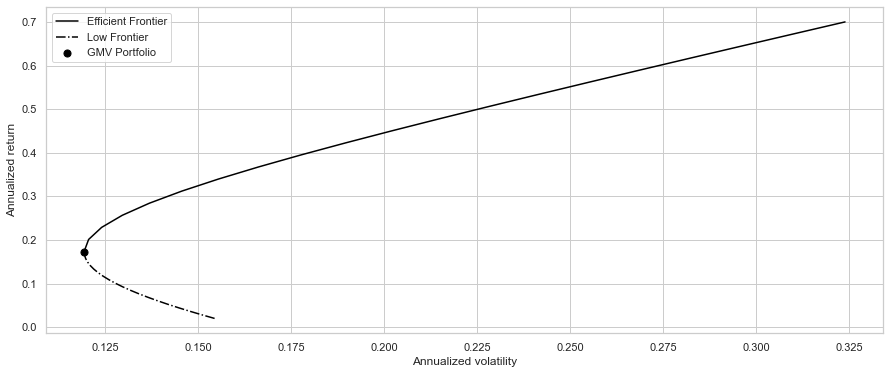

In [11]:
# plot the efficient frontier
eff = pf.efficient_frontier(returns_train,cov_matrix_train,min=0.02,max=0.7,number=20,plot=True)
